# Stock Market Prediction using Numerical and Textual Analysis

# Author:  Surendran R


Stock to analyze and predict: SENSEX (S&P BSE SENSEX) <br>

Date: 01-01-2001 to 31-12-2010

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np 
import pandas as pd 
import lux
import matplotlib.pyplot as plt 
%matplotlib inline

from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

# from sklearn.model_selection import train_test_split


In [2]:
path=r"C:\Users\Anamika\Desktop\TSF\task7\^BSESN.csv"

In [3]:
df=pd.read_csv(path)

In [4]:
df.replace(np.nan,inplace=True)

Date         None
Open         None
High         None
Low          None
Close        None
Adj Close    None
Volume       None
dtype: object


In [5]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2001-01-02,3953.219971,4028.570068,3929.370117,4018.879883,4018.879883,0.0
1,2001-01-03,3977.580078,4067.659912,3977.580078,4060.020020,4060.020020,0.0
2,2001-01-04,4180.970215,4180.970215,4109.549805,4115.370117,4115.370117,0.0
3,2001-01-05,4116.339844,4195.009766,4115.350098,4183.729980,4183.729980,0.0
4,2001-01-08,4164.759766,4206.720215,4101.529785,4120.430176,4120.430176,0.0


In [6]:
df

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [7]:
df=df[['Date','Close']]

In [8]:
df.shape

(4987, 2)

In [9]:
df.info() #date is object type convert to datetime

<class 'lux.core.frame.LuxDataFrame'>
RangeIndex: 4987 entries, 0 to 4986
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    4987 non-null   object 
 1   Close   4987 non-null   float64
dtypes: float64(1), object(1)
memory usage: 78.0+ KB


In [10]:
df['Date']=pd.to_datetime(df.Date,format='%Y-%m-%d')

In [11]:
df.info()

<class 'lux.core.frame.LuxDataFrame'>
RangeIndex: 4987 entries, 0 to 4986
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    4987 non-null   datetime64[ns]
 1   Close   4987 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 78.0 KB


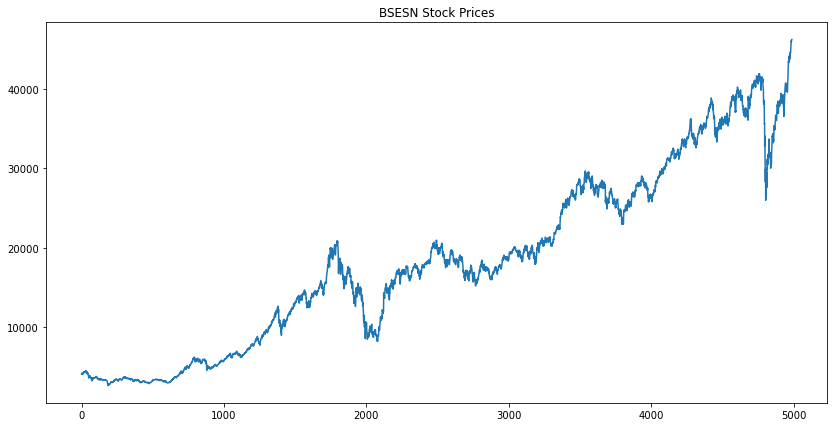

In [12]:
plt.figure(figsize=(14,7))
plt.title('BSESN Stock Prices')
plt.plot(df['Close'])
# plt.xticks(np.arange(0,1500, 300), df['Date'][0:1500:300])
plt.show()

In [13]:
df_train,df_test=df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]

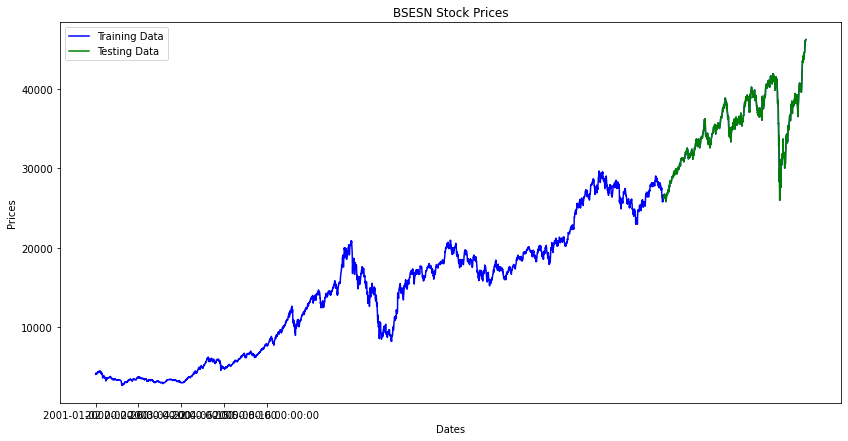

In [14]:
plt.figure(figsize=(14,7))
plt.title('BSESN Stock Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(df['Close'], 'blue', label='Training Data')
plt.plot(df_test['Close'], 'green', label='Testing Data')
plt.xticks(np.arange(0,1500, 300), df['Date'][0:1500:300])
plt.legend()

### ARIMA

ARIMA (AutoRegressive Integrated Moving Average) is a forecasting algorithm based on the idea that the information in the past values of the time series can alone be used to predict the future values.

ARIMA models explain a time series based on its own past values, basically its own lags and the lagged forecast errors.

An ARIMA model is characterized by 3 terms (p, d, q):

- p is the order of the AR term

- d is the number of differencing required to make the time series stationary

- q is the order of the MA term

As we see in the parameters required by the model, any stationary time series can be modeled with ARIMA models.



### Stationarity

A stationary time series is one whose properties do not depend on the time at which the series is observed. Thus, time series with trends, or with seasonality, are not stationary — the trend and seasonality will affect the value of the time series at different times.

Subtract the previous value from the current value. Now if we just difference once, we might not get a stationary series so we might need to do that multiple times. 

And the minimum number of differencing operations needed to make the series stationary needs to be imputed into our ARIMA model. 

### ADF test

We'll use the Augumented Dickey Fuller (ADF) test to check if the price series is stationary.

The null hypothesis of the ADF test is that the time series is non-stationary. So, if the p-value of the test is less than the significance level (0.05) then we can reject the null hypothesis and infer that the time series is indeed stationary.

So, in our case, if the p-value > 0.05 we'll need to find the order of differencing.

In [15]:
#check if price is stationary
from statsmodels.tsa.stattools import adfuller

result= adfuller(df.Close.dropna())
print(f"ADF Statistic:{result[0]}")
print(f"p-value : {result[1]}")

ADF Statistic:0.3613071651381934
p-value : 0.9799888557291913


p-value > 0.05 , therefore the time series is not stationary

In [17]:
# !pip install pmdarima

In [18]:
from pmdarima.arima.utils import ndiffs

In [19]:
ndiffs(df.Close,test="adf")

1

therefore d value is 1

#### p
p is the order of the Auto Regressive (AR) term. It refers to the number of lags to be used as predictors.

We can find out the required number of AR terms by inspecting the Partial Autocorrelation (PACF) plot.

The partial autocorrelation represents the correlation between the series and its lags.

In [20]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [21]:
diff=df.Close.diff().dropna()

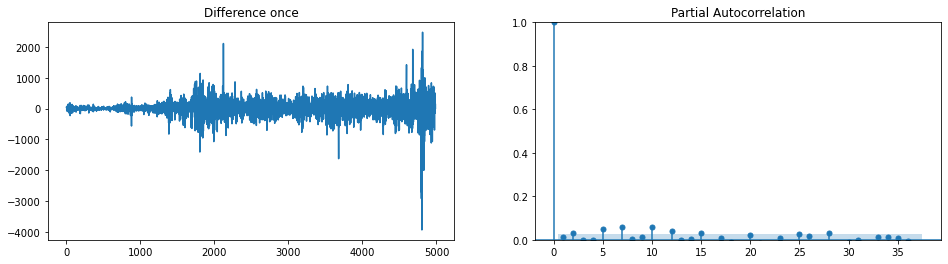

In [22]:


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(diff)
ax1.set_title("Difference once")
ax2.set_ylim(0, 1)
plot_pacf(diff, ax=ax2);

#### q

q is the order of the Moving Average (MA) term. It refers to the number of lagged forecast errors that should go into the ARIMA Model.

We can look at the ACF plot for the number of MA terms.

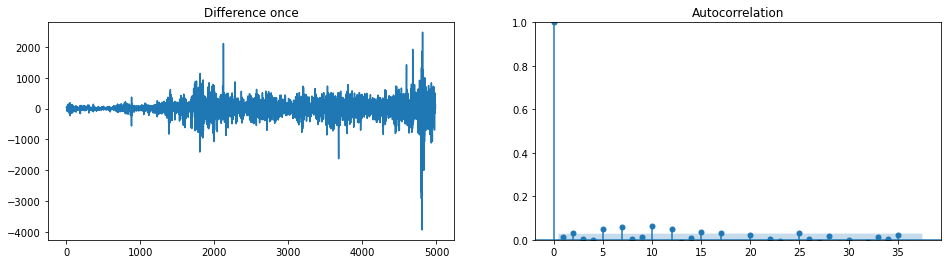

In [23]:
diff = df.Close.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(diff)
ax1.set_title("Difference once")
ax2.set_ylim(0, 1)
plot_acf(diff, ax=ax2);

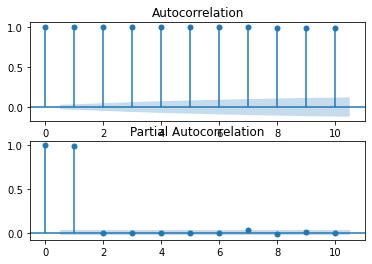

In [24]:
dataset=df.copy()
dataset.set_index('Date', inplace=True)
dataset = dataset[['Close']] 
from matplotlib import pyplot
pyplot.figure()
pyplot.subplot(211)
plot_acf(dataset, ax=pyplot.gca(),lags=10)
pyplot.subplot(212)
plot_pacf(dataset, ax=pyplot.gca(),lags=10)
pyplot.show()

In order to evaluate the ARIMA model, I decided to use two different error functions: Mean Squared Error (MSE) and Symmetric Mean Absolute Percentage Error (SMAPE). SMAPE is commonly used as an accuracy measure based on relative errors.

SMAPE is not currently supported in Scikit-learn as a loss function I, therefore, had first to create this function on my own.

In [25]:
def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))

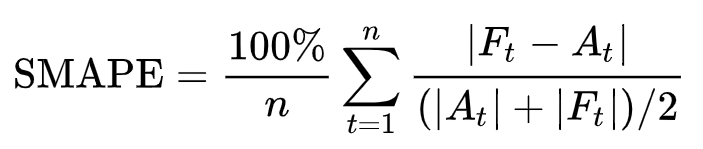

In [26]:
train_ar = df_train['Close'].values
test_ar = df_test['Close'].values
history = [x for x in train_ar]
print(type(history))
predictions = list()
for t in range(len(test_ar)):
    model = ARIMA(history, order=(2,1,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
error = mean_squared_error(test_ar, predictions)
print('Testing Mean Squared Error: %.3f' % error)
error2 = smape_kun(test_ar, predictions)
print('Symmetric mean absolute percentage error: %.3f' % error2)

<class 'list'>
Testing Mean Squared Error: 164134.266
Symmetric mean absolute percentage error: 13.349


SMAPE is commonly used loss function for Time Series problems and can, therefore, provide a more reliable analysis. That showed that our model is good.

In [27]:
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 4985
Model:                 ARIMA(2, 1, 1)   Log Likelihood              -34706.171
Method:                       css-mle   S.D. of innovations            255.490
Date:                Thu, 17 Dec 2020   AIC                          69422.343
Time:                        23:07:22   BIC                          69454.914
Sample:                             1   HQIC                         69433.760
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.4577      3.784      2.235      0.025       1.042      15.874
ar.L1.D.y      0.0368      0.467      0.079      0.937      -0.878       0.951
ar.L2.D.y      0.0315      0.015      2.060      0.0

<AxesSubplot:>

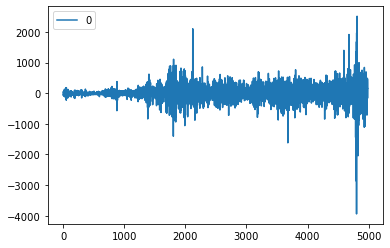

In [28]:
residuals=pd.DataFrame(model_fit.resid)
residuals.plot()

<AxesSubplot:ylabel='Density'>

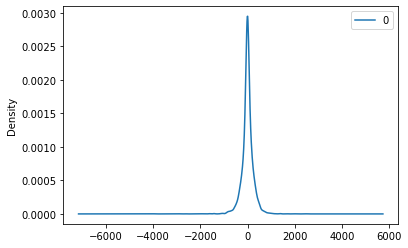

In [29]:
residuals.plot(kind='kde')

In [30]:
residuals.describe()

,0
count,4985.000000
mean,0.016117
std,255.515281
min,-3941.002578
25%,-89.335501
50%,-1.140952
75%,97.216449
max,2513.042770


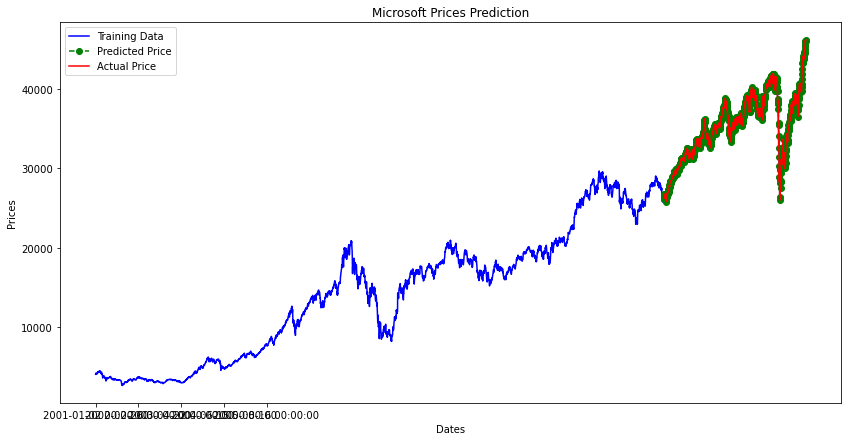

In [32]:
plt.figure(figsize=(14,7))
plt.plot(df['Close'], 'green', color='blue', label='Training Data')
plt.plot(df_test.index, predictions, color='green', marker='o', linestyle='dashed', label='Predicted Price')
plt.plot(df_test.index, df_test['Close'], color='red', label='Actual Price')
plt.title('Microsoft Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.xticks(np.arange(0,1500, 300), df['Date'][0:1500:300])
plt.legend()

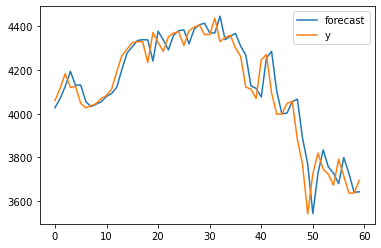

In [33]:
# Actual vs Fitted
model_fit.plot_predict(
    start=1,
    end=60,
    dynamic=False,
);

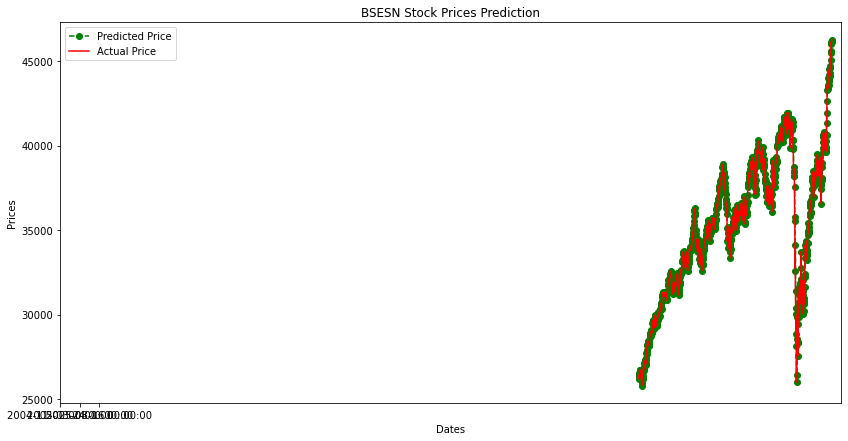

In [35]:
plt.figure(figsize=(14,7))
plt.plot(df_test.index, predictions, color='green', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(df_test.index, df_test['Close'], color='red', label='Actual Price')
plt.legend()
plt.title('BSESN Stock Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.xticks(np.arange(1000,1259,100), df['Date'][1000:1259:100])
plt.legend()

The above image is a zoomed in version. From this can be noticed how the two curves closely follow each other. However, the predicted price seems to look like a “noisy” version of the actual price.

This analysis using ARIMA lead overall to appreciable results. This model demonstrated in fact to offer good prediction accuracy and to be relatively fast compared to other alternatives such as RRNs (Recurrent Neural Networks).

# Sentiment analysis

## NLTK's VADER module
VADER is an NLTK module that provides sentiment scores based on words used ("completely" boosts a score, while "slightly" reduces it), on capitalization & punctuation ("GREAT!!!" is stronger than "great."), and negations (words like "isn't" and "doesn't" affect the outcome).
<br>To view the source code visit https://www.nltk.org/_modules/nltk/sentiment/vader.html

In [38]:
!pip install nltk

In [44]:
import pandas as pd #Importing the PANDAS python library
import numpy as np #importing Numpy
%matplotlib inline 
#from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer #initiating VADER instance
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [43]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Anamika\AppData\Roaming\nltk_data...


True

In [45]:
analyser =SentimentIntensityAnalyzer()

In [53]:
headlines= pd.read_csv(r"C:\Users\Anamika\Desktop\TSF\task7\india-news-headlines.csv")
headlines.head()
# cleaning dataset
#Drop rows with missing values
headlines.dropna(inplace=True)

In [54]:
headlines.tail()

,publish_date,headline_category,headline_text
3297167,20200630,gadgets-news,why tiktok removed 1 65 crore videos in india
3297168,20200630,entertainment.hindi.bollywood,apurva asrani calls alia bhatts mother soni ra...
3297169,20200630,entertainment.hindi.bollywood,kangana ranaut gets a doll version of herself ...
3297170,20200630,entertainment.hindi.bollywood,meezaan jaffrey reminisces his childhood days ...
3297171,20200630,entertainment.telugu.movies.news,prabhas20 titled as radhe shyam prabhas and po...


In [55]:
headlines["Date"] = pd.to_datetime(headlines["publish_date"],format='%Y%m%d')
headlines.info()

<class 'lux.core.frame.LuxDataFrame'>
Int64Index: 3297172 entries, 0 to 3297171
Data columns (total 4 columns):
 #   Column             Dtype         
---  ------             -----         
 0   publish_date       int64         
 1   headline_category  object        
 2   headline_text      object        
 3   Date               datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 125.8+ MB


In [56]:
headlines.shape

(3297172, 4)

In [57]:
#Grouping the headlines for each day
#headlines['headline_text'] = headlines.groupby(['Date']).transform(lambda x : ' '.join(x)) 
headlines = headlines.drop_duplicates(subset='Date', keep='first', inplace=False) 
headlines.reset_index(inplace = True, drop = True)
headlines

,publish_date,headline_category,headline_text,Date
0,20010101,sports.wwe,win over cena satisfying but defeating underta...,2001-01-01
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...,2001-01-02
2,20010103,unknown,Powerless north India gropes in the dark,2001-01-03
3,20010104,unknown,The string that pulled Stephen Hawking to India,2001-01-04
4,20010105,unknown,Light combat craft takes India into club class,2001-01-05
...,...,...,...,...
7075,20200626,city.bhubaneswar,Containment zone residents slam high prices ch...,2020-06-26
7076,20200627,life-style.parenting.moments,like me i wont let you have a toxic relationsh...,2020-06-27
7077,20200628,entertainment.bengali.movies.news,Atanu Ghosh plans to rewrite old scripts to ma...,2020-06-28
7078,20200629,life-style.fashion.celeb-style,6 hot and stylish bikini looks of Katrina Kaif,2020-06-29


In [58]:
headlines.shape

(7080, 4)

In [59]:
#Calculating score for each news headline in the dataframe/dataset
i=0 #counter
compval1 = [ ]  #empty list to hold our computed 'compound' VADER scores
while i<len(headlines):
    
    k = analyser.polarity_scores(headlines.iloc[i]['headline_text'])
    compval1.append(k['compound'])
    
    i = i+1
    
#converting sentiment values to numpy for easier usage
compval1 = np.array(compval1)
len(compval1)

7080

In [60]:
headlines['VADER score'] = compval1

In [61]:
headlines.head(20)

,publish_date,headline_category,headline_text,Date,VADER score
0,20010101,sports.wwe,win over cena satisfying but defeating underta...,2001-01-01,-0.0000
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...,2001-01-02,0.2924
2,20010103,unknown,Powerless north India gropes in the dark,2001-01-03,-0.4939
3,20010104,unknown,The string that pulled Stephen Hawking to India,2001-01-04,0.0000
4,20010105,unknown,Light combat craft takes India into club class,2001-01-05,-0.3400
5,20010106,unknown,Light combat craft takes India into club class,2001-01-06,-0.3400
6,20010107,unknown,Muslim body rules out talks on Ayodhya,2001-01-07,0.0000
7,20010108,unknown,Sangh Parivar; Babri panel up the ante,2001-01-08,0.0000
8,20010109,unknown,Financier Bharat Shah held for alleged links w...,2001-01-09,0.0000
9,20010110,city.patna,Fend for yourselves; Pande tells doctors,2001-01-10,0.0000


In [62]:
i = 0
predicted_value = [ ] #empty series to hold our predicted values
while(i<len(headlines)):
    if ((headlines.iloc[i]['VADER score'] >= 0.1)):
        predicted_value.append('positive')
        i = i+1
    elif ((headlines.iloc[i]['VADER score'] > -0.1) & (headlines.iloc[i]['VADER score'] < 0.1)):
        predicted_value.append('neutral')
        i = i+1
    elif ((headlines.iloc[i]['VADER score'] <= -0.1)):
        predicted_value.append('negative')
        i = i+1

In [63]:
headlines['sentiment'] = predicted_value
headlines.head(10)

,publish_date,headline_category,headline_text,Date,VADER score,sentiment
0,20010101,sports.wwe,win over cena satisfying but defeating underta...,2001-01-01,-0.0000,neutral
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...,2001-01-02,0.2924,positive
2,20010103,unknown,Powerless north India gropes in the dark,2001-01-03,-0.4939,negative
3,20010104,unknown,The string that pulled Stephen Hawking to India,2001-01-04,0.0000,neutral
4,20010105,unknown,Light combat craft takes India into club class,2001-01-05,-0.3400,negative
5,20010106,unknown,Light combat craft takes India into club class,2001-01-06,-0.3400,negative
6,20010107,unknown,Muslim body rules out talks on Ayodhya,2001-01-07,0.0000,neutral
7,20010108,unknown,Sangh Parivar; Babri panel up the ante,2001-01-08,0.0000,neutral
8,20010109,unknown,Financier Bharat Shah held for alleged links w...,2001-01-09,0.0000,neutral
9,20010110,city.patna,Fend for yourselves; Pande tells doctors,2001-01-10,0.0000,neutral


In [64]:
headlines.sentiment.value_counts()

neutral     3896
positive    1925
negative    1259
Name: sentiment, dtype: int64

### Hybrid

In [65]:
df_merge = pd.merge(df, headlines, how='left', on='Date')
df_merge

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [66]:
new_df=df_merge[['Close','sentiment']]
new_df

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [67]:
new_df.groupby(['sentiment']).mean()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()